# Training Deep Q-Learning Agents

In [1]:
import gymnasium as gym
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

from dqn import QAgent

In [2]:
# define environment
env = gym.make('LunarLander-v2', render_mode='rgb_array')

# set seed
seed = 31
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episodes = 5
batch_size = 64

# define and train agent
agent = QAgent(env)
returns, steps = agent.training(env, batch_size, episodes)

env.close()

episode: 1/5, return: -195, epsilon: 0.94, steps: 94
episode: 2/5, return: -89, epsilon: 0.80, steps: 82
episode: 3/5, return: -23, epsilon: 0.67, steps: 93
episode: 4/5, return: -315, epsilon: 0.56, steps: 88
episode: 5/5, return: -274, epsilon: 0.44, steps: 118


In [3]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 50 episodes: {np.mean(returns[-50:])}')

Average return: -179.20727572059036
Average return last 50 episodes: -179.20727572059036


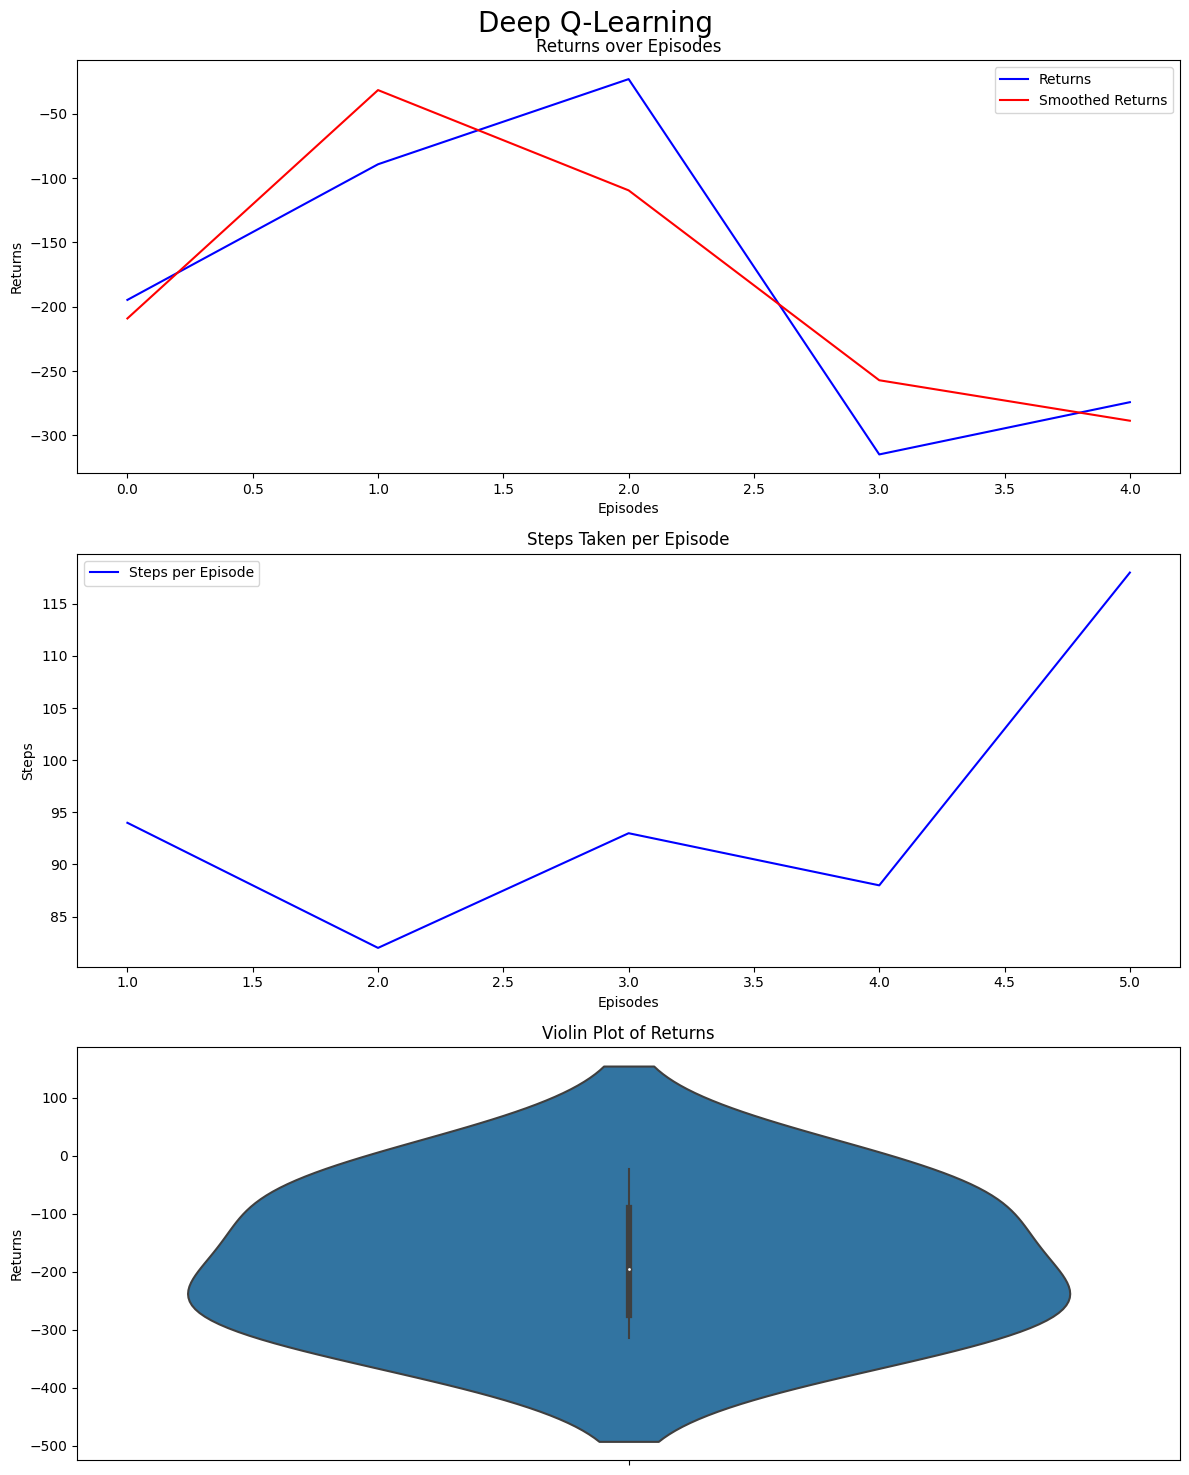

In [7]:
# Determine the window length based on the size of the data
window_length = min(50, len(returns))

# Apply Savitzky-Golay filter
smoothed_returns = savgol_filter(returns, window_length=window_length, polyorder=3)
# MA = pd.series(returns).rolling(window=100).mean()

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot returns and smoothed returns
sns.lineplot(data=returns, label='Returns', color='blue', ax=axs[0])
sns.lineplot(data=smoothed_returns, label='Smoothed Returns', color='red', ax=axs[0])
# sns.lineplot(data=MA, label='Smoothed Returns', color='red', ax=axs[0])
axs[0].set_ylabel('Returns')
axs[0].set_xlabel('Episodes')
axs[0].set_title('Returns over Episodes')
axs[0].legend()

# Plot steps taken per episode
sns.lineplot(x=episodes, y=steps, label='Steps per Episode', color='blue', ax=axs[1])
axs[1].set_ylabel('Steps')
axs[1].set_xlabel('Episodes')
axs[1].set_title('Steps Taken per Episode')
axs[1].legend()

# Plot violin plot of returns
sns.violinplot(y=returns, ax=axs[2])
axs[2].set_ylabel('Returns')
axs[2].set_title('Violin Plot of Returns')

plt.suptitle('Deep Q-Learning', fontsize=20)
plt.tight_layout()
plt.show()
